In [1]:
import pandas as pd

df = pd.read_csv('https://labfile.oss.aliyuncs.com/courses/1363/PUBG.csv')
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

/Users/hui/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hui/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


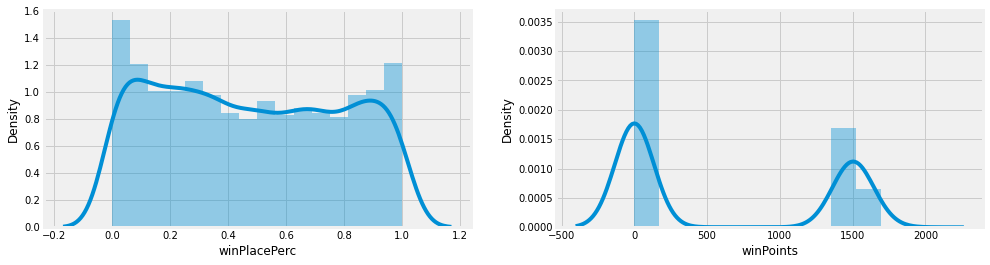

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)
sns.distplot(df['winPlacePerc'], ax=ax1)
sns.distplot(df['winPoints'], ax=ax2)
plt.show()

/Users/hui/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


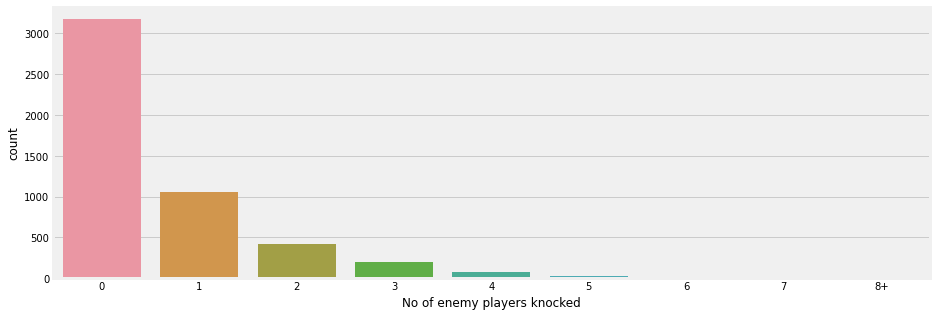

<Figure size 432x288 with 0 Axes>

In [4]:
train_dbno = pd.DataFrame(df['DBNOs'].value_counts(), columns=['DBNOs'])
dbno = train_dbno.iloc[:9, :]
dbno.iloc[8]['DBNOs'] = train_dbno.iloc[8:, :].sum()['DBNOs']
plt.figure(figsize=(14, 5))
sns.barplot(dbno.index, dbno.DBNOs)
plt.gca().set_xticklabels([0, 1, 2, 3, 4, 5, 6, 7, '8+'])
plt.gca().set_xlabel('No of enemy players knocked')
plt.gca().set_ylabel("count")
plt.show()
plt.savefig("enemy_")

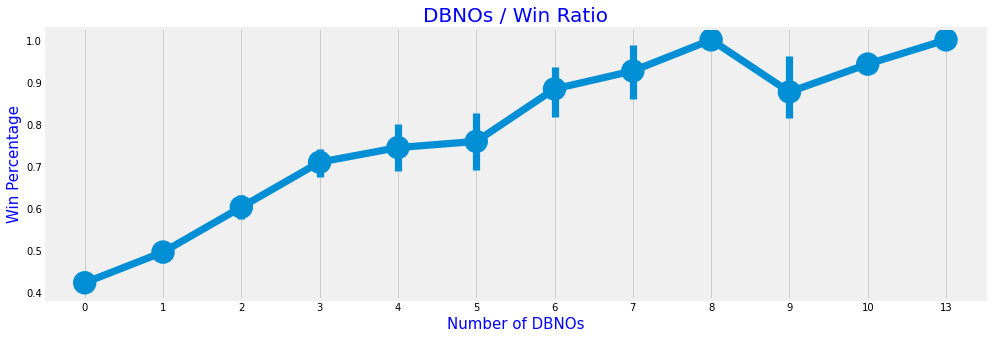

In [5]:
f, ax1 = plt.subplots(figsize=(15, 5))
sns.pointplot(x='DBNOs', y='winPlacePerc', data=df, alpha=0.8)
plt.xlabel('Number of DBNOs', fontsize=15, color='blue')
plt.ylabel('Win Percentage', fontsize=15, color='blue')
plt.title('DBNOs / Win Ratio', fontsize=20, color='blue')
plt.grid()
plt.show()

/Users/hui/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hui/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


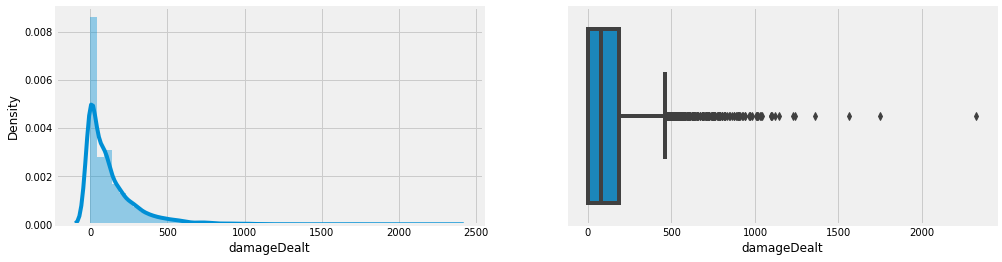

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)

sns.distplot(df['damageDealt'], ax=ax1)
sns.boxplot(df['damageDealt'], ax=ax2)
plt.show()

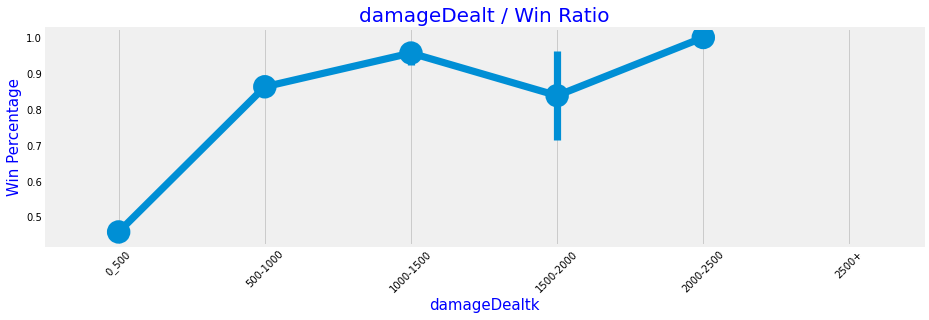

In [7]:
data = df.copy()
# 将伤害值分为 6 个部分。
data['damageDealt_rank'] = pd.cut(data['damageDealt'],
                                  [-1, 500, 1000, 1500, 2000, 2500, 60000],
                                  labels=['0_500', '500-1000', '1000-1500',
                                          '1500-2000', '2000-2500', '2500+'])

f, ax1 = plt.subplots(figsize=(14, 4))
sns.pointplot(x='damageDealt_rank', y='winPlacePerc', data=data, alpha=0.8)
plt.xlabel('damageDealtk', fontsize=15, color='blue')
plt.xticks(rotation=45)
plt.ylabel('Win Percentage', fontsize=15, color='blue')
plt.title('damageDealt / Win Ratio', fontsize=20, color='blue')
plt.grid()
plt.show()

/Users/hui/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


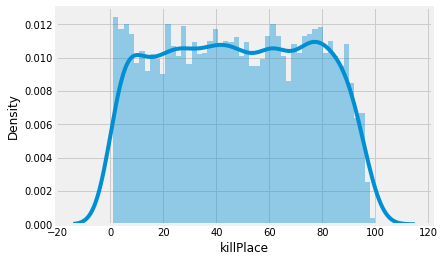

In [8]:
plt.figure()
sns.distplot(df['killPlace'], bins=50)
plt.show()

/Users/hui/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hui/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


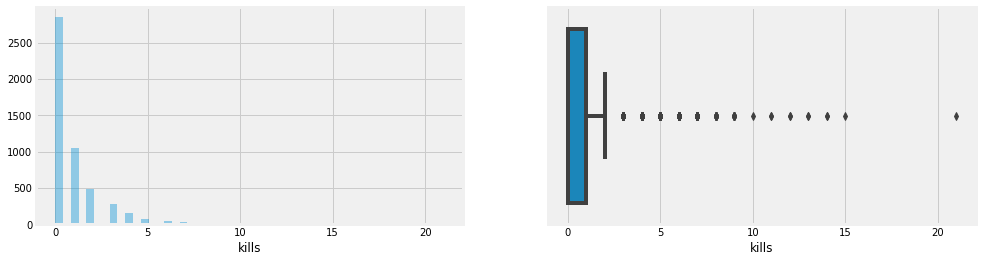

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)
sns.distplot(df['kills'], kde=False, ax=ax1)
sns.boxplot(df['kills'], ax=ax2)
plt.show()

/Users/hui/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


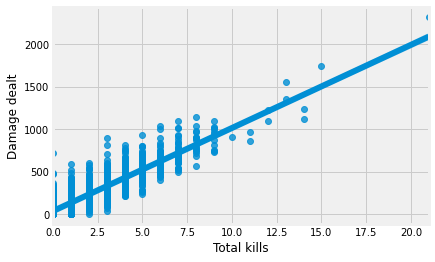

In [10]:
plt.figure()
sns.regplot(df['kills'].values, df['damageDealt'].values)
plt.gca().set_ylabel('Damage dealt')
plt.gca().set_xlabel('Total kills')
plt.show()

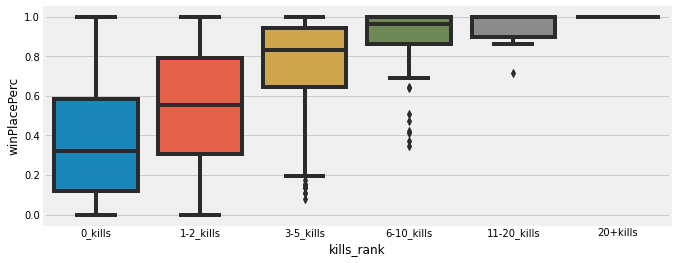

In [11]:
data = df.copy()
# 将杀死敌人的数量分为 6 个部分。
data['kills_rank'] = pd.cut(data['kills'], [-1, 0, 2, 5, 10, 20, 60],
                            labels=['0_kills', '1-2_kills', '3-5_kills',
                                    '6-10_kills', '11-20_kills', '20+kills'])
plt.figure(figsize=(10, 4))
sns.boxplot(x='kills_rank', y='winPlacePerc', data=data)
plt.show()

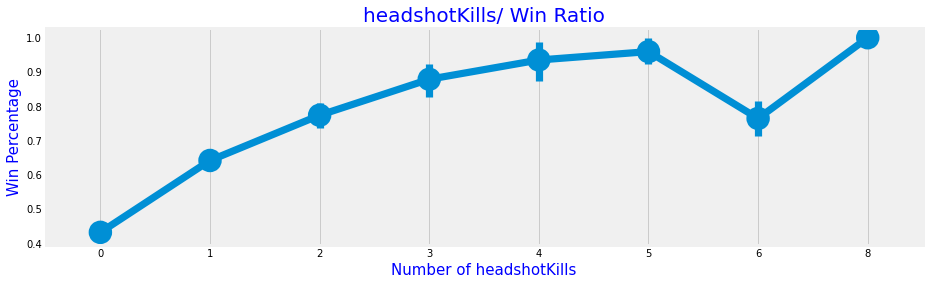

In [12]:
f, ax1 = plt.subplots(figsize=(14, 4))
sns.pointplot(x='headshotKills', y='winPlacePerc', data=df, alpha=0.8)
plt.xlabel('Number of headshotKills', fontsize=15, color='blue')
plt.ylabel('Win Percentage', fontsize=15, color='blue')
plt.title('headshotKills/ Win Ratio', fontsize=20, color='blue')
plt.grid()
plt.show()

/Users/hui/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='killStreaks'>

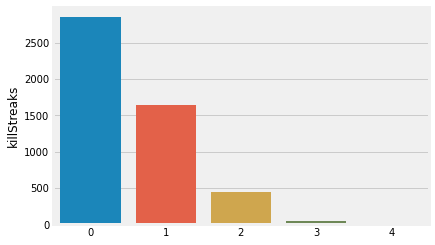

In [13]:
killstreak = pd.DataFrame(df['killStreaks'].value_counts())
killstreak.iloc[4] = killstreak.iloc[4:].sum()
killstreak = killstreak[:5]
sns.barplot(killstreak.index, killstreak['killStreaks'])

/Users/hui/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='move', ylabel='Density'>

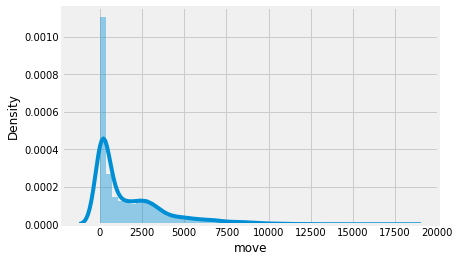

In [14]:
data = df.copy()
data['move'] = data['rideDistance']+data['swimDistance']+data['walkDistance']
sns.distplot(data['move'])

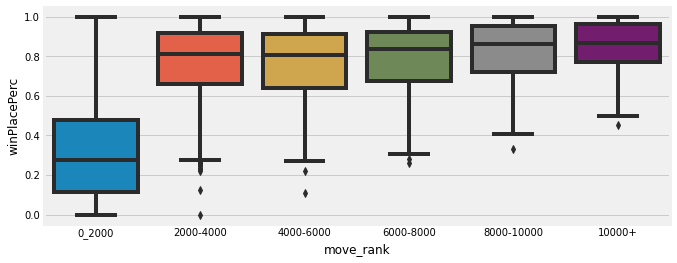

In [15]:
data = df.copy()
# 将距离划分为 6 个部分。
data['move'] = data['rideDistance']+data['swimDistance']+data['walkDistance']
data['move_rank'] = pd.cut(data['move'], [-1, 2000, 4000, 6000, 8000, 10000, 60000],
                           labels=['0_2000', '2000-4000', '4000-6000',
                                   '6000-8000', '8000-10000', '10000+'])
plt.figure(figsize=(10, 4))
sns.boxplot(x='move_rank', y='winPlacePerc', data=data)
plt.show()

/Users/hui/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hui/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='weaponsAcquired'>

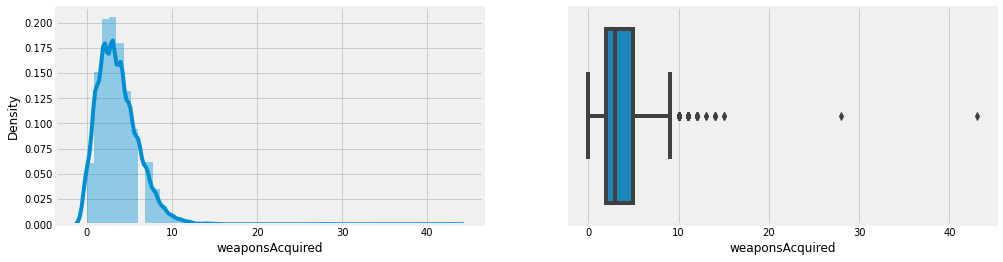

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)
sns.distplot(df['weaponsAcquired'], ax=ax1)
sns.boxplot(df['weaponsAcquired'], ax=ax2)

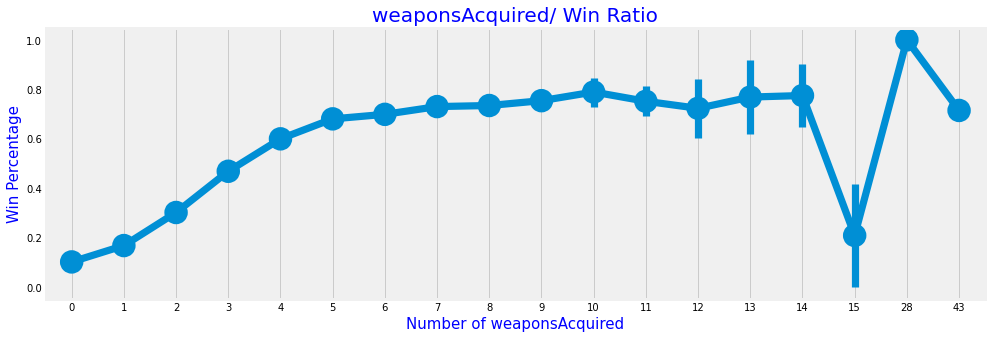

In [17]:
f, ax1 = plt.subplots(figsize=(15, 5))
sns.pointplot(x='weaponsAcquired', y='winPlacePerc', data=df, alpha=0.8)
plt.xlabel('Number of weaponsAcquired', fontsize=15, color='blue')
plt.ylabel('Win Percentage', fontsize=15, color='blue')
plt.title('weaponsAcquired/ Win Ratio', fontsize=20, color='blue')
plt.grid()
plt.show()

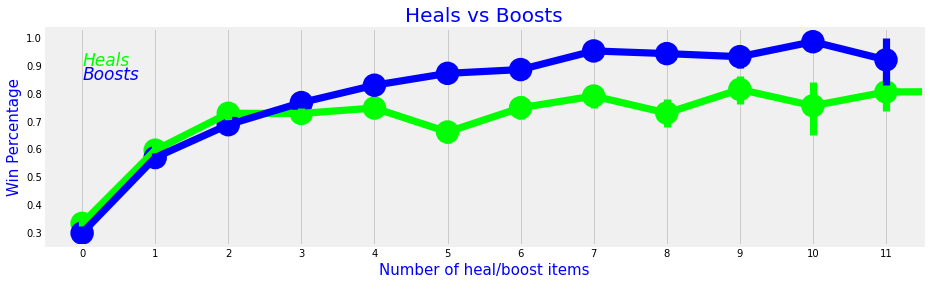

In [18]:
data = df.copy()
f, ax1 = plt.subplots(figsize=(14, 4))
sns.pointplot(x='heals', y='winPlacePerc', data=data, color='lime', alpha=0.8)
sns.pointplot(x='boosts', y='winPlacePerc', data=data, color='blue', alpha=0.8)
plt.text(0, 0.9, 'Heals', color='lime', fontsize=17, style='italic')
plt.text(0, 0.85, 'Boosts', color='blue', fontsize=17, style='italic')
plt.xlabel('Number of heal/boost items', fontsize=15, color='blue')
plt.ylabel('Win Percentage', fontsize=15, color='blue')
plt.title('Heals vs Boosts', fontsize=20, color='blue')
plt.grid()

In [19]:
df['healsAndBoosts'] = df['heals']+df['boosts']
df['totalDistance'] = df['walkDistance']+df['rideDistance']+df['swimDistance']

In [20]:
df['boostsPerWalkDistance'] = df['boosts'] / \
    (df['walkDistance']+1)  # 加 1 是为了防止分母为 0
df['boostsPerWalkDistance'].fillna(0, inplace=True)
df['healsPerWalkDistance'] = df['heals']/(df['walkDistance']+1)
df['healsPerWalkDistance'].fillna(0, inplace=True)
df['healsAndBoostsPerWalkDistance'] = df['healsAndBoosts'] / \
    (df['walkDistance']+1)
df['healsAndBoostsPerWalkDistance'].fillna(0, inplace=True)
df[['walkDistance', 'boosts', 'boostsPerWalkDistance', 'heals',
    'healsPerWalkDistance', 'healsAndBoosts', 'healsAndBoostsPerWalkDistance']][40:45]

,walkDistance,boosts,boostsPerWalkDistance,heals,healsPerWalkDistance,healsAndBoosts,healsAndBoostsPerWalkDistance
40,327.30,1,0.003046,1,0.003046,2,0.006092
41,128.80,0,0.000000,0,0.000000,0,0.000000
42,52.52,0,0.000000,0,0.000000,0,0.000000
43,534.10,1,0.001869,0,0.000000,1,0.001869
44,2576.00,4,0.001552,6,0.002328,10,0.003880


In [21]:
df['killsPerWalkDistance'] = df['kills'] / \
    (df['walkDistance']+1)  # 加 1 是为了防止分母为 0
df['killsPerWalkDistance'].fillna(0, inplace=True)
df[['kills', 'walkDistance', 'rideDistance',
    'killsPerWalkDistance', 'winPlacePerc']].tail(5)

,kills,walkDistance,rideDistance,killsPerWalkDistance,winPlacePerc
4995,0,911.70,1053.0,0.000000,0.3846
4996,0,10.71,0.0,0.000000,0.0215
4997,1,1993.00,0.0,0.000502,0.5000
4998,0,2578.00,5782.0,0.000000,0.6154
4999,0,1465.00,0.0,0.000000,0.8889


In [22]:
df_drop = df.drop(['Id', 'groupId', 'matchId', 'matchType'], axis=1)

In [23]:
from sklearn.model_selection import train_test_split

data_X = df_drop.drop(['winPlacePerc'], axis=1)
data_y = df_drop['winPlacePerc']
train_X, test_X, train_y, test_y = train_test_split(
    data_X, data_y.values, test_size=0.1)

In [24]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=40)  # 构建模型
model.fit(train_X, train_y)  # 训练模型
y_pred = model.predict(test_X)  # 预测
y_pred[:10]

array([0.1051425, 0.49504  , 0.9059275, 0.7889175, 0.75326  , 0.9169825,
       0.3714525, 0.7490475, 0.9262125, 0.441775 ])

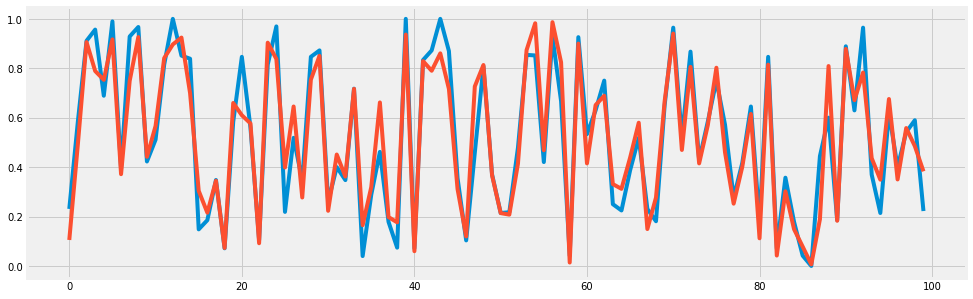

In [25]:
f, ax1 = plt.subplots(figsize=(15, 5))

plt.plot(test_y[:100])
plt.plot(y_pred[:100])

In [26]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred, test_y)

0.009745385543625001